In [1]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google'

Mean Squared Error: 147534370107.58
R² Score: 0.89


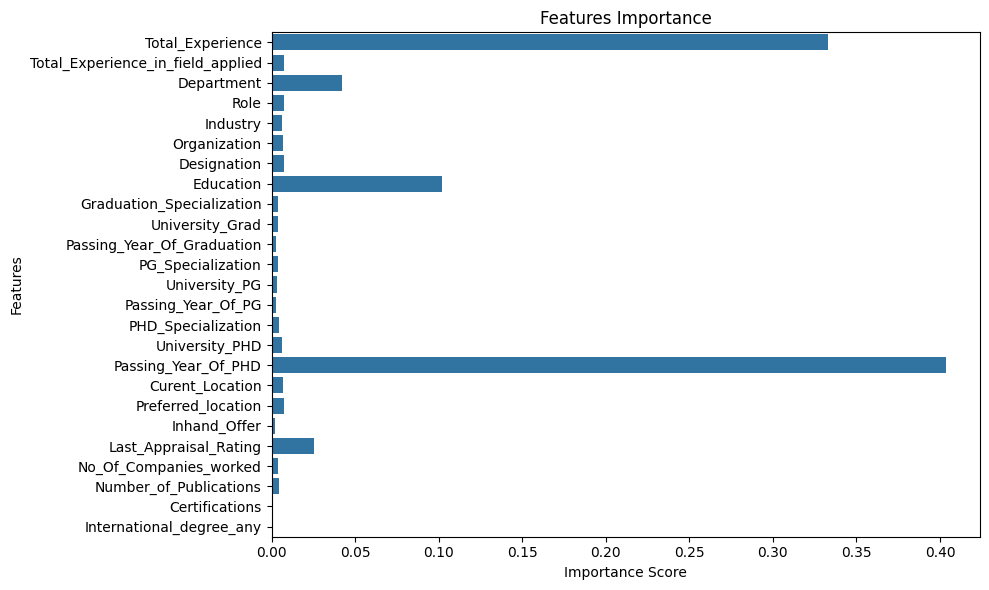

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/expected_ctc.csv')

df.drop(['IDX', 'Applicant_ID'], axis=1, inplace=True)
df.dropna(inplace=True)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
X = df.drop(['Expected_CTC', 'Current_CTC'], axis=1)
y = df['Expected_CTC']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


importances = model.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Features Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
